# PROJECT PHASE - 3 MODELING

In [356]:
# Import Libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [357]:
# Load Data

primary_df = pd.read_csv("/home/chinnu/Desktop/Semester_2/NLP/Project/ProjectAssignment2 Notebook/final_label_changeorg.csv")
secondary_df = pd.read_csv("/home/chinnu/Desktop/Semester_2/NLP/Project/ProjectAssignment2 Notebook/final_label_NY_stance.csv")

In [358]:
primary_df.head()

,text,label
0,Postpone CBSE Board Exams,unclear
1,Pay rise for paramedics and nurses,unclear
2,Too Soon To Open Georgia!,pro-mitigation
3,Request to reconsider DPS Ruby Park school tui...,pro-mitigation
4,Covid-19 Aesthetics / Salon / Massage Industry...,unclear


In [359]:
primary_df_train_set, primary_test_set = train_test_split(primary_df, test_size=0.3, shuffle=True, random_state=1234)

In [360]:
primary_df_train_set.shape
primary_test_set.shape

(450, 2)

In [361]:
categoriess = ['anti-mitigation', 'pro-mitigation', 'unclear']
primary_df_list = primary_df_train_set["text"]

In [362]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(primary_df_list, primary_df_train_set['label'])
X_train_counts.shape

(1050, 2890)

In [363]:
count_vect.vocabulary_.get(u'fee')

966

#### Multinomial Fit

In [364]:
clf = MultinomialNB().fit(X_train_counts, primary_df_train_set["label"])
X_new_counts = count_vect.transform(primary_test_set["text"])
predicted = clf.predict(X_new_counts)
print(metrics.classification_report(primary_test_set['label'], predicted, target_names=unique_labels(primary_df['label'])))

                 precision    recall  f1-score   support

anti-mitigation       0.60      0.14      0.23        43
 pro-mitigation       0.61      0.72      0.66       187
        unclear       0.66      0.66      0.66       220

       accuracy                           0.63       450
      macro avg       0.62      0.51      0.51       450
   weighted avg       0.63      0.63      0.62       450



#### Accuracy Measure for MultinomialNB Prediction on primary test set is 0.63

Text(91.68, 0.5, 'PRED')

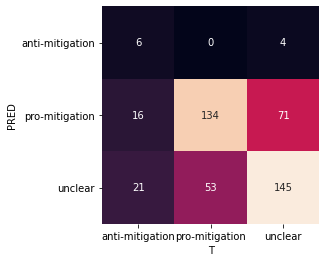

In [365]:
mat=confusion_matrix(primary_test_set['label'],predicted)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=unique_labels(primary_df["label"]),yticklabels=unique_labels(primary_df["label"]))
plt.xlabel('T')
plt.ylabel('PRED')

#### Prediction on Secondary Data (Entirely Test Set)

In [366]:
X_new_counts_secondary = count_vect.transform(secondary_df["text"])
predictedSecondaryTest = clf.predict(X_new_counts_secondary)
accuracy_score(secondary_df['label'], predictedSecondaryTest)

0.3948339483394834

#### Accuracy Measure for MultinomialNB Prediction on secondary test set is 0.39

#### Using Logistic Regression, for the same 

In [367]:
lr_model = LogisticRegression(penalty="none", 
                              multi_class="multinomial",
                              solver="lbfgs").fit(X_train_counts, primary_df_train_set["label"])
y_hat_lr_test = lr_model.predict(X_new_counts)

In [368]:
print(metrics.classification_report(primary_test_set['label'], y_hat_lr_test, 
                            target_names=unique_labels(primary_df['label'])))

                 precision    recall  f1-score   support

anti-mitigation       0.43      0.35      0.38        43
 pro-mitigation       0.68      0.63      0.66       187
        unclear       0.66      0.72      0.69       220

       accuracy                           0.65       450
      macro avg       0.59      0.57      0.58       450
   weighted avg       0.65      0.65      0.65       450



#### Accuracy for Logistic Regression is found to be 0.65 (higher than for MultinomialNB) On the primary Test Set

In [369]:
y_hat_lr_test_second = lr_model.predict(X_new_counts_secondary)
print(metrics.classification_report(secondary_df['label'], y_hat_lr_test_second, 
                            target_names=unique_labels(primary_df['label'])))

                 precision    recall  f1-score   support

anti-mitigation       0.10      0.11      0.11        79
 pro-mitigation       0.64      0.54      0.58       475
        unclear       0.39      0.49      0.43       259

       accuracy                           0.48       813
      macro avg       0.38      0.38      0.37       813
   weighted avg       0.51      0.48      0.49       813



#### Accuracy for Logistic Regression is 0.48 (while in Multinomial was only 0.39) on the secondary set

### 
### Feature Engineering 
### 

In [370]:
# Adding Word Count, Character Count, Average Word Length and Stemming 
primary_df['word_count'] = primary_df["text"].apply(lambda x: len(str(x).split(" ")))
primary_df['char_count'] = primary_df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
primary_df['avg_word_length'] = primary_df['char_count'] / primary_df['word_count']
porter = PorterStemmer()
nltk.download('stopwords')
sent_words=stopwords.words('english')
primary_df['stem']=primary_df['text'].apply(lambda x:" ".join([porter.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in sent_words]).lower())

[nltk_data] Downloading package stopwords to /home/chinnu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [371]:
primary_df.head()

,text,label,word_count,char_count,avg_word_length,stem
0,Postpone CBSE Board Exams,unclear,4,22,5.500000,postpon cbse board exam
1,Pay rise for paramedics and nurses,unclear,6,29,4.833333,pay rise paramed nurs
2,Too Soon To Open Georgia!,pro-mitigation,5,21,4.200000,too soon to open georgia
3,Request to reconsider DPS Ruby Park school tui...,pro-mitigation,13,70,5.384615,request reconsid dp rubi park school tuition t...
4,Covid-19 Aesthetics / Salon / Massage Industry...,unclear,11,62,5.636364,covid aesthet salon massag industri warn econo...


In [372]:
# New Feature Covid
empty_dict = {}
ls = []
for i in primary_df.stem:
    ls.append(i)
for i in ls:
    for j in i.split(" "):
        if j not in empty_dict:
            empty_dict[j] = 1
        else:
            empty_dict[j] += 1
from collections import OrderedDict
v = {k: v for k, v in sorted(empty_dict.items(), key=lambda item: item[1])}
sorted(v.values(), reverse=True)
for a,b in v.items():
    if b == 712:
        print(a)

new_ls = []
for i in primary_df.stem:
    if 'covid' in i:
        new_ls.append(True)
    else:
        new_ls.append(False)
primary_df['is_covid_present'] = new_ls


covid


In [373]:
# Creating a feature to see if char_count is greater than mean of column or not 
mean_char_count = primary_df['char_count'].mean()
char_ls = []
for i in primary_df.char_count:
    if i < mean_char_count:
        char_ls.append(False)
    else:
        char_ls.append(True)
primary_df['avg_char_greaterthanmean'] = char_ls

# Creating a feature to see if char_count is greater than mean of column or not 
mean_avg_wl = primary_df['avg_word_length'].mean()
mean_avg_wl_ls = []
for j in primary_df.avg_word_length:
    if j < mean_avg_wl:
        mean_avg_wl_ls.append(False)
    else:
        mean_avg_wl_ls.append(True)
primary_df['mean_avg_wl'] = mean_avg_wl_ls

#### Added new features 

#### Covid is a highly occuring term so if a string 'covid' occurs in the data, then it is labelled as True else False
#### Adding this feature to the primary set

#### If char_count is greater than mean of char_count column taking as True else False
#### Adding this feature as well and same goes with mean_avg_wl which is True if avg word length is higher than mean of column else false

In [374]:
primary_df.head()

,text,label,word_count,char_count,avg_word_length,stem,is_covid_present,avg_char_greaterthanmean,mean_avg_wl
0,Postpone CBSE Board Exams,unclear,4,22,5.500000,postpon cbse board exam,False,False,False
1,Pay rise for paramedics and nurses,unclear,6,29,4.833333,pay rise paramed nurs,False,False,False
2,Too Soon To Open Georgia!,pro-mitigation,5,21,4.200000,too soon to open georgia,False,False,False
3,Request to reconsider DPS Ruby Park school tui...,pro-mitigation,13,70,5.384615,request reconsid dp rubi park school tuition t...,True,True,False
4,Covid-19 Aesthetics / Salon / Massage Industry...,unclear,11,62,5.636364,covid aesthet salon massag industri warn econo...,True,True,False


In [375]:
primary_df_train_set_fn, primary_test_set_fn = train_test_split(primary_df, test_size=0.3, shuffle=True, random_state=1234)

In [376]:
covid_feature = primary_df_train_set_fn['is_covid_present'].astype(int)
# word_count_feature = primary_df_train_set_fn['word_count']
char_count_feature = primary_df_train_set_fn['avg_char_greaterthanmean'].astype(int)
avg_wl_feature = primary_df_train_set_fn['mean_avg_wl'].astype(int)

In [377]:
primary_df_train_set_fn=primary_df_train_set_fn[['text','word_count','char_count','avg_word_length', 'stem', 'is_covid_present', 'label']]
inp_varn = primary_df_train_set_fn.iloc[:, :6]
X_train_counts_fn = count_vect.fit_transform(inp_varn['text'], primary_df_train_set_fn['label'])
# X_train_final = np.insert(X_train_counts_fn.todense(), X_train_counts_fn.shape[1], covid_feature, axis=1)
X_train_final = np.insert(X_train_counts_fn.todense(), X_train_counts_fn.shape[1], [covid_feature, char_count_feature, avg_wl_feature], axis=1)
X_train_final.shape

(1050, 2893)

In [378]:
covid_feature_test = primary_test_set_fn['is_covid_present'].astype(int)
# word_count_feature_test = primary_test_set_fn['word_count']
char_count_feature_test = primary_test_set_fn['avg_char_greaterthanmean'].astype(int)
mean_avg_wl_feature_test = primary_test_set_fn['mean_avg_wl'].astype(int)
print(type(word_count_feature_test))
X_new_count_fn = count_vect.transform(primary_test_set_fn['text'])
X_new_count_fn_final = np.insert(X_new_count_fn.todense(), X_new_count_fn.shape[1], [covid_feature_test, char_count_feature_test, mean_avg_wl_feature_test], axis=1)

<class 'pandas.core.series.Series'>


In [379]:
clf_feat = MultinomialNB().fit(X_train_final, primary_df_train_set_fn["label"])
predicted_on_feat = clf_feat.predict(X_new_count_fn_final)
print(metrics.classification_report(primary_test_set_fn['label'], predicted_on_feat, target_names=unique_labels(primary_df['label'])))

                 precision    recall  f1-score   support

anti-mitigation       0.56      0.12      0.19        43
 pro-mitigation       0.62      0.73      0.67       187
        unclear       0.67      0.67      0.67       220

       accuracy                           0.64       450
      macro avg       0.61      0.51      0.51       450
   weighted avg       0.64      0.64      0.62       450



#### Accuracy on primary after adding features is increased to 0.64 (0.63 without features)

#### Now testing on secondary

In [382]:
# Adding Word Count, Character Count, Average Word Length and Stemming 
secondary_df['word_count'] = secondary_df["text"].apply(lambda x: len(str(x).split(" ")))
secondary_df['char_count'] = secondary_df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
secondary_df['avg_word_length'] = secondary_df['char_count'] / secondary_df['word_count']
porter = PorterStemmer()
nltk.download('stopwords')
sent_words=stopwords.words('english')
secondary_df['stem']=secondary_df['text'].apply(lambda x:" ".join([porter.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in sent_words]).lower())


# New Feature Covid
empty_dicts = {}
lss = []
for i in secondary_df.stem:
    lss.append(i)
for i in ls:
    for j in i.split(" "):
        if j not in empty_dicts:
            empty_dicts[j] = 1
        else:
            empty_dicts[j] += 1

new_lss = []
for i in secondary_df.stem:
    if 'covid' in i:
        new_lss.append(True)
    else:
        new_lss.append(False)
secondary_df['is_covid_present'] = new_lss

# Creating a feature to see if char_count is greater than mean of column or not on secondary
mean_char_count = secondary_df['char_count'].mean()
char_lss = []
for i in secondary_df.char_count:
    if i < mean_char_count:
        char_lss.append(False)
    else:
        char_lss.append(True)
secondary_df['avg_char_greaterthanmean'] = char_lss

# Creating a feature to see if char_count is greater than mean of column or not 
mean_avg_wl = secondary_df['avg_word_length'].mean()
mean_avg_wl_ls = []
for j in secondary_df.avg_word_length:
    if j < mean_avg_wl:
        mean_avg_wl_ls.append(False)
    else:
        mean_avg_wl_ls.append(True)
secondary_df['mean_avg_wl'] = mean_avg_wl_ls

covid_feature_tests = secondary_df['is_covid_present'].astype(int)
# word_count_feature_test = primary_test_set_fn['word_count']
char_count_feature_tests = secondary_df['avg_char_greaterthanmean'].astype(int)
mean_avg_wl_feature_tests = secondary_df['mean_avg_wl'].astype(int)

secondary_df.head()

[nltk_data] Downloading package stopwords to /home/chinnu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,word_count,char_count,avg_word_length,stem,is_covid_present,avg_char_greaterthanmean,mean_avg_wl
0,To all those who gloat “elections have consequ...,unclear,16,93,5.812500,to gloat elect consequ let administ vaccin con...,False,False,True
1,Corporations and health privacy in the US? How...,unclear,29,155,5.344828,corpor health privaci us how start outlaw drug...,False,False,True
2,No. Done with it.,unclear,4,14,3.500000,no done,False,False,False
3,I have not eaten outside my house since March....,unclear,63,242,3.841270,i eaten outsid hous sinc march i miss favorit ...,False,False,False
4,More people die each day in US from the virus ...,pro-mitigation,29,118,4.068966,more peopl die day us viru taiwan new case tel...,False,False,False


In [383]:
X_new_count_fns = count_vect.transform(secondary_df['text'])
X_new_count_fns_final = np.insert(X_new_count_fns.todense(), X_new_count_fns.shape[1], [covid_feature_tests, char_count_feature_tests, mean_avg_wl_feature_tests], axis=1)

In [386]:
predicted_on_feats = clf_feat.predict(X_new_count_fns_final)
accuracy_score(secondary_df['label'], predicted_on_feats)

0.3936039360393604

#### Accuracy score on secondary set didn't improve (0.39 without features)

#### Using Logistic for the same on primary test set 

In [389]:
lr_model_feat = LogisticRegression(penalty="none", 
                              multi_class="multinomial",
                              solver="lbfgs").fit(X_train_final, primary_df_train_set_fn["label"])
y_hat_lr_test_feat = lr_model_feat.predict(X_new_count_fn_final)
print(metrics.classification_report(primary_test_set_fn['label'], y_hat_lr_test_feat, target_names=unique_labels(primary_df['label'])))

                 precision    recall  f1-score   support

anti-mitigation       0.55      0.28      0.37        43
 pro-mitigation       0.67      0.65      0.66       187
        unclear       0.66      0.75      0.70       220

       accuracy                           0.66       450
      macro avg       0.63      0.56      0.58       450
   weighted avg       0.65      0.66      0.65       450



#### Accuracy on primary improved to 0.66 (0.65 without features)

In [390]:
y_hat_lr_test_secondary = lr_model_feat.predict(X_new_count_fns_final)
print(metrics.classification_report(secondary_df['label'], y_hat_lr_test_secondary, 
                            target_names=unique_labels(secondary_df['label'])))

                 precision    recall  f1-score   support

anti-mitigation       0.08      0.06      0.07        79
 pro-mitigation       0.62      0.61      0.61       475
        unclear       0.40      0.43      0.41       259

       accuracy                           0.50       813
      macro avg       0.36      0.37      0.37       813
   weighted avg       0.50      0.50      0.50       813



#### Accuracy on secondary data set improved from 0.48 to 0.50 in the secondary set